In [1]:
from pathlib import Path

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
def specify_taxid_abundance(intput_file, taxids: list):
    df = pd.read_csv(intput_file, sep='\t', header=None,
                     names=['abundance', 'numReads', 'numUniqueReads', 'taxRank', 'taxID', 'name'])
    df['name'] = df['name'].str.strip()
    
    
    abundance = dict()
    abundance['unclassified'] = df.loc[0]['abundance']
    for taxid in taxids:
        specify = df[df['taxID'] == taxid]
        name = specify['name'].iloc[0]
        abundance[name] = specify['abundance'].iloc[0]
    abundance['other'] = 100 - sum(abundance.values())
    return abundance

In [3]:
dirpath = Path('/media/NGS/Nanopore_1/mNGS/20210426_SA/time_filt/centrifuge')

summary = dict()
for filepath in dirpath.iterdir():
    if filepath.stem.startswith('barcode01') and filepath.suffix == '.txt':
        summary[filepath.stem] = specify_taxid_abundance(filepath, [9606, 1280, 51665])

df = pd.DataFrame(summary).T.sort_index()
df['time'] = df.index.str.replace('_kreport', '').str.replace('barcode01_', '').str.replace('h', '').astype(int)

df.insert(1, 'other', df.pop('other'))

df = df.set_index('time')

In [30]:
plt.style.use('ggplot')

Text(0, 0.5, 'Abundance')

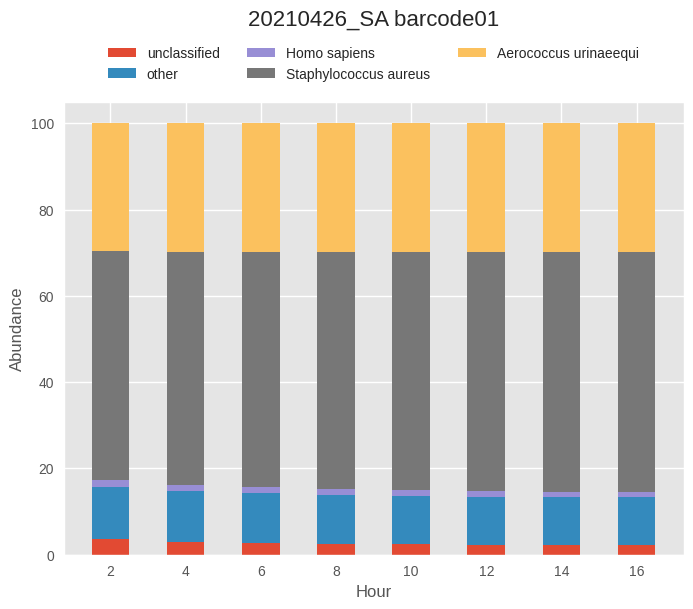

In [31]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)

width = 1

cols = []
for col in df.columns:
    ax.bar(df.index, df[col], width, label=col, bottom=df[cols].sum(axis=1),)
    cols.append(col)
ax.legend(loc='upper center', bbox_to_anchor=(.5, 1.15), ncol=3)
ax.set_title('20210426_SA barcode01', fontsize=16, y=1.15)
ax.set_xlabel('Hour', fontsize=12)
ax.set_ylabel('Abundance', fontsize=12)

In [ ]:
dirpath = Path('/media/NGS/Data_Analysis/20201130_rapid_diagnostic_with_nanopore/time_vs_identity/centrifuge')

summary = dict()
for filepath in dirpath.iterdir():
    if filepath.stem.startswith('barcode04') and filepath.suffix == '.txt':
        summary[filepath.stem] = specify_taxid_abundance(filepath, [9606, 573])

df = pd.DataFrame(summary).T.sort_index()
df['time'] = df.index.str.replace('_kreport', '').str.replace('barcode04_', '').str.replace('m', '').astype(int)
df.head()

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)

width = 4
ax.bar(df['time'], df['unclassified'], width, label='unclassified')
ax.bar(df['time'], df['other'], width, label='other', bottom=df['unclassified'])
ax.bar(df['time'], df['Homo sapiens'], width, label='Homo sapiens', bottom=df[['unclassified', 'other']].sum(axis=1))
ax.bar(df['time'], df['Klebsiella pneumoniae'], width, label='Klebsiella pneumoniae',
       bottom=df[['unclassified', 'other', 'Homo sapiens']].sum(axis=1))


ax.set_ylim(0, 100)
ax.legend(bbox_to_anchor=(1.05, 1))
ax.legend(loc='upper center', bbox_to_anchor=(.5, 1.15), ncol=3)
ax.set_title('20210426_SA barcode04', fontsize=16, y=1.15)
ax.set_xlabel('Min', fontsize=12)
ax.set_ylabel('Abundance', fontsize=12)
fig.savefig(
    '/media/NGS/Data_Analysis/20201130_rapid_diagnostic_with_nanopore/time_filter_to_id/figure/20210426_SA_barcode04_in_min.png'
    , bbox_inches='tight', pad_inches=0.5, dpi=150)

In [ ]:
dirpath = Path('/media/NGS/Data_Analysis/20201130_rapid_diagnostic_with_nanopore/time_vs_identity/centrifuge')

summary = dict()
for filepath in dirpath.iterdir():
    if filepath.stem.startswith('barcode02') and filepath.suffix == '.txt':
        summary[filepath.stem] = specify_taxid_abundance(filepath, [9606, 1282, 1280])

df = pd.DataFrame(summary).T.sort_index()
df['time'] = df.index.str.replace('_kreport', '').str.replace('barcode02_', '').str.replace('m', '').astype(int)
df.head()

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)

width = 4
ax.bar(df['time'], df['unclassified'], width, label='unclassified')
ax.bar(df['time'], df['other'], width, label='other', bottom=df['unclassified'])
ax.bar(df['time'], df['Homo sapiens'], width, label='Homo sapiens', bottom=df[['unclassified', 'other']].sum(axis=1))
ax.bar(df['time'], df['Staphylococcus epidermidis'], width, label='Staphylococcus epidermidis',
       bottom=df[['unclassified', 'other', 'Homo sapiens']].sum(axis=1))
ax.bar(df['time'], df['Staphylococcus aureus'], width, label='Staphylococcus aureus',
       bottom=df[['unclassified', 'other', 'Homo sapiens', 'Staphylococcus epidermidis']].sum(axis=1))


ax.set_ylim(0, 100)
ax.legend(bbox_to_anchor=(1.05, 1))
ax.legend(loc='upper center', bbox_to_anchor=(.5, 1.15), ncol=3)
ax.set_title('20210426_SA barcode02', fontsize=16, y=1.15)
ax.set_xlabel('Min', fontsize=12)
ax.set_ylabel('Abundance', fontsize=12)
fig.savefig(
    '/media/NGS/Data_Analysis/20201130_rapid_diagnostic_with_nanopore/time_filter_to_id/figure/20210426_SA_barcode02_in_min.png'
    , bbox_inches='tight', pad_inches=0.5, dpi=150)

In [ ]:
dirpath = Path('/media/NGS/Nanopore_1/mNGS/20210426_SA/time_filt/centrifuge')

summary = dict()
for filepath in dirpath.iterdir():
    if filepath.stem.startswith('barcode03') and filepath.suffix == '.txt':
        summary[filepath.stem] = specify_taxid_abundance(filepath, [9606, 1282, 1280])

df = pd.DataFrame(summary).T.sort_index()
df['time'] = df.index.str.replace('_kreport', '').str.replace('barcode03_', '').str.replace('h', '').astype(int)
df.head()

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)

width = 1
ax.bar(df['time'], df['unclassified'], width, label='unclassified')
ax.bar(df['time'], df['other'], width, label='other', bottom=df['unclassified'])
ax.bar(df['time'], df['Homo sapiens'], width, label='Homo sapiens', bottom=df[['unclassified', 'other']].sum(axis=1))
ax.bar(df['time'], df['Staphylococcus epidermidis'], width, label='Staphylococcus epidermidis',
       bottom=df[['unclassified', 'other', 'Homo sapiens']].sum(axis=1))
ax.bar(df['time'], df['Staphylococcus aureus'], width, label='Staphylococcus aureus',
       bottom=df[['unclassified', 'other', 'Homo sapiens', 'Staphylococcus epidermidis']].sum(axis=1))


ax.set_ylim(0, 100)
ax.legend(bbox_to_anchor=(1.05, 1))
ax.legend(loc='upper center', bbox_to_anchor=(.5, 1.15), ncol=3)
ax.set_title('20210426_SA barcode03', fontsize=16, y=1.15)
ax.set_xlabel('Hour', fontsize=12)
ax.set_ylabel('Abundance', fontsize=12)
fig.savefig(
    '/media/NGS/Data_Analysis/20201130_rapid_diagnostic_with_nanopore/time_filter_to_id/figure/20210426_SA_barcode03_in_hour.png'
    , bbox_inches='tight', pad_inches=0.5, dpi=150)